In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from efficientnet.tfkeras import EfficientNetB4


In [5]:
train_dir = 'plant_disease_dataset'

IMG_SIZE = 380 

datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [6]:
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(15, activation='softmax')  
])

base_model.trainable = False 

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


2025-06-28 20:06:33.693659: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-28 20:06:33.693693: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-28 20:06:33.693696: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-28 20:06:33.693714: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-28 20:06:33.693726: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnet-b4 (Functional)    │ (None, 12, 12, 1792)   │    17,673,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │        26,895 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,700,711 (67.52 MB)

 Trainable params: 26,895 (105.06 KB)

 Non-trainable params: 17,673,816 (67.42 MB)

In [8]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.8367 - loss: 0.5308
Epoch 1: val_accuracy improved from -inf to 0.87797, saving model to best_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 416s 805ms/step - accuracy: 0.8367 - loss: 0.5308 - val_accuracy: 0.8780 - val_loss: 0.3930
Epoch 2/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.8481 - loss: 0.4866
Epoch 2: val_accuracy improved from 0.87797 to 0.89131, saving model to best_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 409s 791ms/step - accuracy: 0.8480 - loss: 0.4866 - val_accuracy: 0.8913 - val_loss: 0.3511
Epoch 3/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.8515 - loss: 0.4555
Epoch 3: val_accuracy improved from 0.89131 to 0.90005, saving model to best_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 413s 798ms/step - accuracy: 0.8515 - loss: 0.4556 - val_accuracy: 0.9000 - val_loss: 0.3288
Epoch 4/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8536 - loss: 0.4575
Epoch 4: val_accuracy did not improve from 0.90005
517/517 ━━━━━━━━━━━━━━━━━━━━ 743s 1s/step - accuracy: 0.8536 - loss: 0.4575 - val_accuracy: 0.8945 - val_loss: 0.3272
Epoch 5/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.8631 - loss: 0.4226
Epoch 5: val_accuracy improved from 0.90005 to 0.90199, saving model to best_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 418s 808ms/step - accuracy: 0.8631 - loss: 0.4226 - val_accuracy: 0.9020 - val_loss: 0.3096


In [ ]:
base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=[checkpoint, early_stop]
)


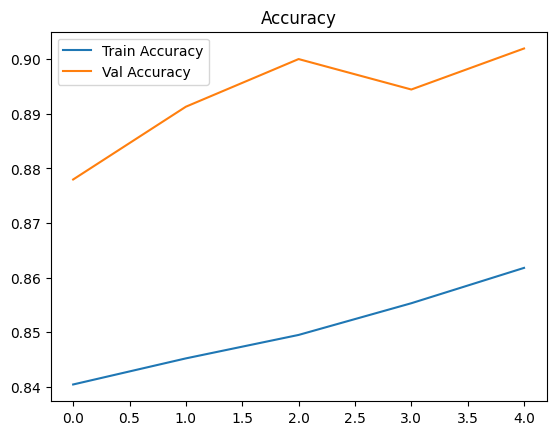

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


In [ ]:
model.save('plant_disease_efficientnetb4model.h5')